Projekt, dotyczy klasyfikacji win ze względu na jakość (kolumna quality). Część zbioru będzie służyła do nauczania klasyfikatorów, a pozostała do testowania ich umiejętności.
Części projektu: 
1. analiza zbioru w taki sam sposób jak na laboratoriach: policzenie klas i atrybutów, sprawdzenie i odrzucenie pustych rekordów itp. 
2. Obliczenie odchylenia standardowego, wartości maksymalnej i minimalnej i innych popularnych miar tylko dla atrybutów numerycznych + omówienie. 
3. Sprawdzenie czy ma miejsce korelacja wśród danych.
Jeśli wartość bezwzględna (moduł) z korelacji między dwoma atrybutami jest większy niż 0,9 to  z dalszej analizy (z tych dwóch atrybutów) odrzucamy ten atrybut, którego suma modułów wszystkich korelacji jest większa.
4. Podział zbioru danych(który jest macierzą liczb) na zbiór uczący i testowy - proponuję tę funkcję: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Podział na części uczącą i testową np. w proporcji 90% (dla uczącego) do 10% (dla testowego). Dodam, że używa się też proporcji 70 do 30. Z zachowaniem liczebności klas zbioru wejściowego - chodzi tutaj o poprawne wywołanie wspomnianej funkcji train_test_split!
Stworzone w ten sposób zbiory: uczący i testowy warto zapisać (jako osobne pliki). Wtedy nie trzeba będzie znów losować zbiorów itp.
5. Uczenie i testowanie zadanych klasyfikatorów. Doczytanie o ich danych wejściowych i o tym jak działają. Proszę przetestować różne warianty parametrów wejściowych klasyfikatorów.
 
Dla Panów zespołu będą to klasyfikatory:
- Drzewo decyzyjne
- AdaBoost (np. ten: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html )
Żeby porównać dwa klasyfikatory, uczymy je zawsze na tym samym zbiorze uczącym i zawsze testujemy na tym samym testowym.
Przy porównywaniu jakości klasyfikacji warto zastosować narzędzia/miary poznane podczas zajęć, m.in proszę o wyliczanie dokładności (ang. accuracy) dla każdego klasyfikatora (tj. konkretnego testu na danym klasyfikatorze).
6. Opis wyników + wnioski
7. Cały projekt proszę zapisać w jednym pliku Jupyter Notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytanie zbioru

In [2]:
df = pd.read_csv('WineQT.csv')

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

# Analiza zbioru

Liczba obiektów:  1143
Liczba klas:  6
Obiektów w klasie  5 :  483
Obiektów w klasie  6 :  462
Obiektów w klasie  7 :  143
Obiektów w klasie  4 :  33
Obiektów w klasie  8 :  16
Obiektów w klasie  3 :  6
Liczba atrybutów:  13
Ilość braków:  0


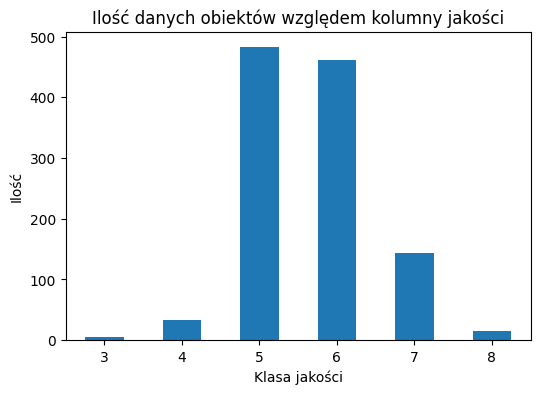

In [3]:
# liczba obiektów
print("Liczba obiektów: ", df.shape[0])
# liczba klas
klasy = df['quality'].unique()
print("Liczba klas: ", klasy.shape[0])
# liczba obiektów
for i in list(klasy):
    print("Obiektów w klasie ", i, ": ", len(df[df['quality'] == i]))
# liczba atrybutów
print("Liczba atrybutów: ", df.shape[1])
# liczba braków
print("Ilość braków: ", df.isnull().sum().sum())

# wykres
plt.figure(figsize=(6, 4))
df['quality'].value_counts().sort_index().plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem kolumny jakości', fontsize=12)
plt.xlabel('Klasa jakości', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 6 klas jakości (3, 4, 5, 6, 7, 8) oraz nie posiada braków. Większość obiektów mieści się w klasach 5, 6, 7. Jednocześnie ma 13 atrybutów, z czego jeden to ID, który jest zbędny

In [4]:
df = df.drop(columns = 'Id')

Atrybut **Id** dla obiektu o numerze 1142 ma wartość 1597, co może sugerować zagubienie części danych w procesie zbierania ich (nie dostarczono wszystkich), bądź pomyłkę przy numeracji obiektów

Wykresy

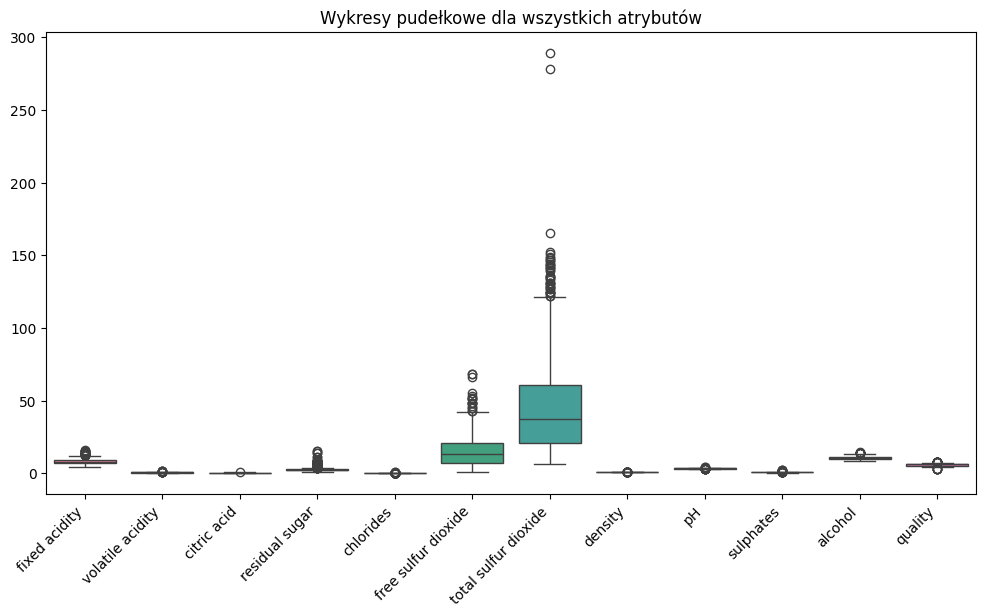

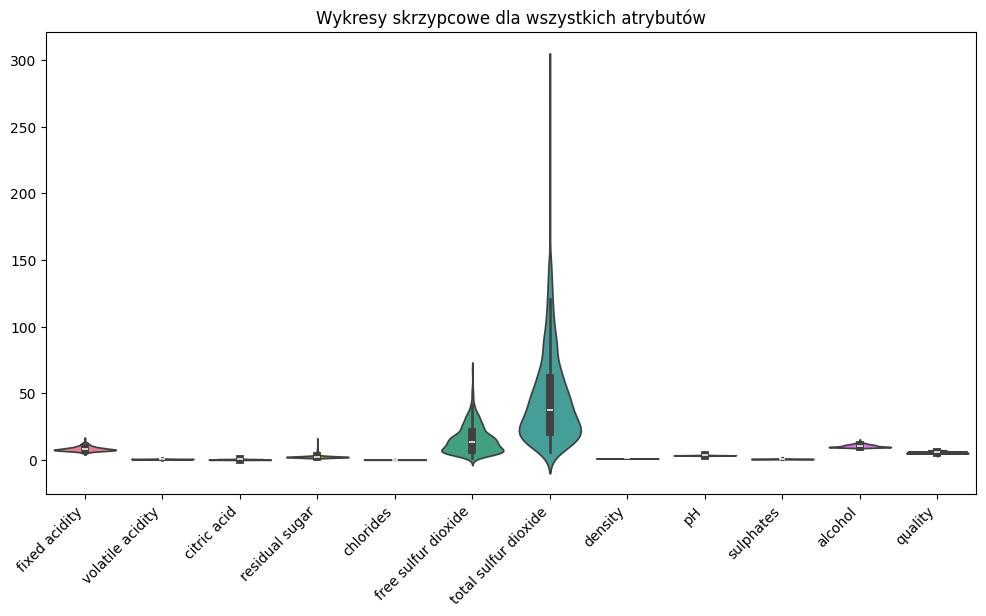

In [5]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.boxplot(data = df).set_title("Wykresy pudełkowe dla wszystkich atrybutów")
plt.show()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.violinplot(data = df).set_title("Wykresy skrzypcowe dla wszystkich atrybutów")
plt.show()

Z wykresu wynika, że kolumny free sulfur dioxide i total sulfur dioxide posiadają kilka obiektów o wartościach podejrzanie niepasujących do reszty. Prawdopodobnie są to błędy.

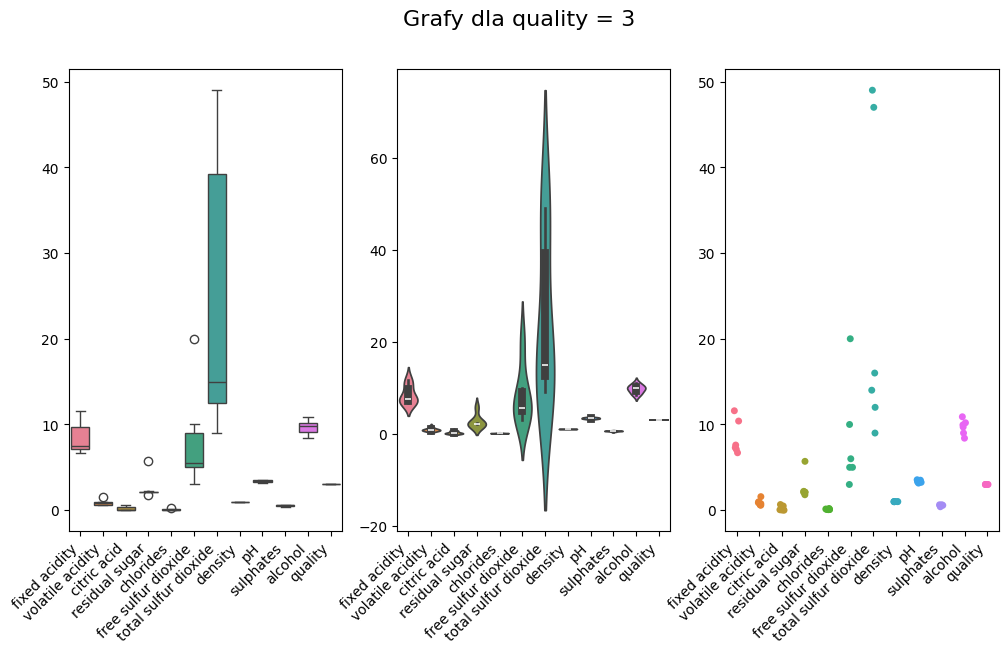

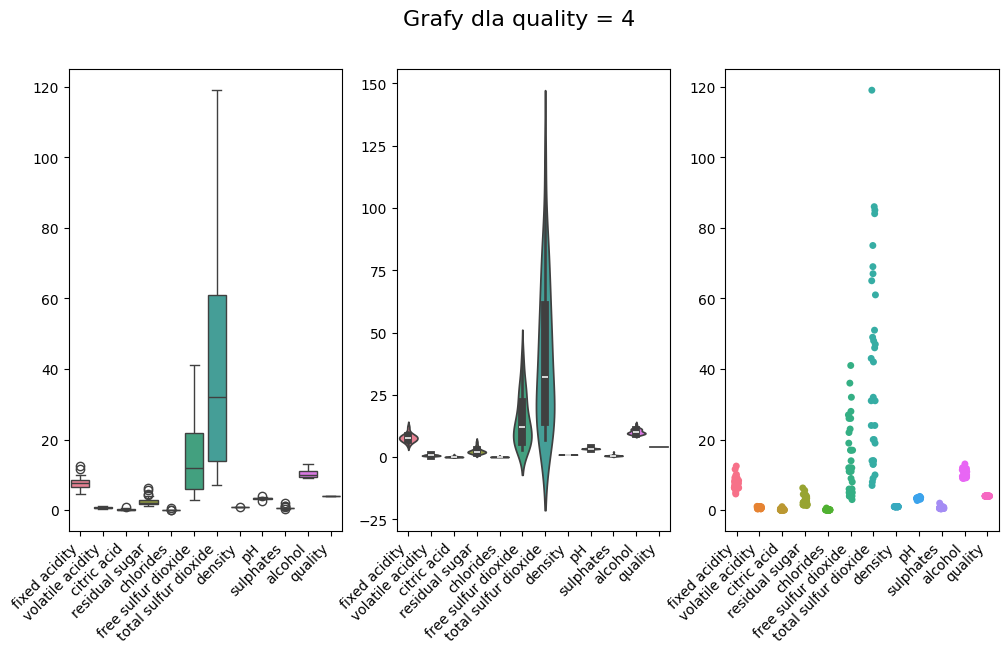

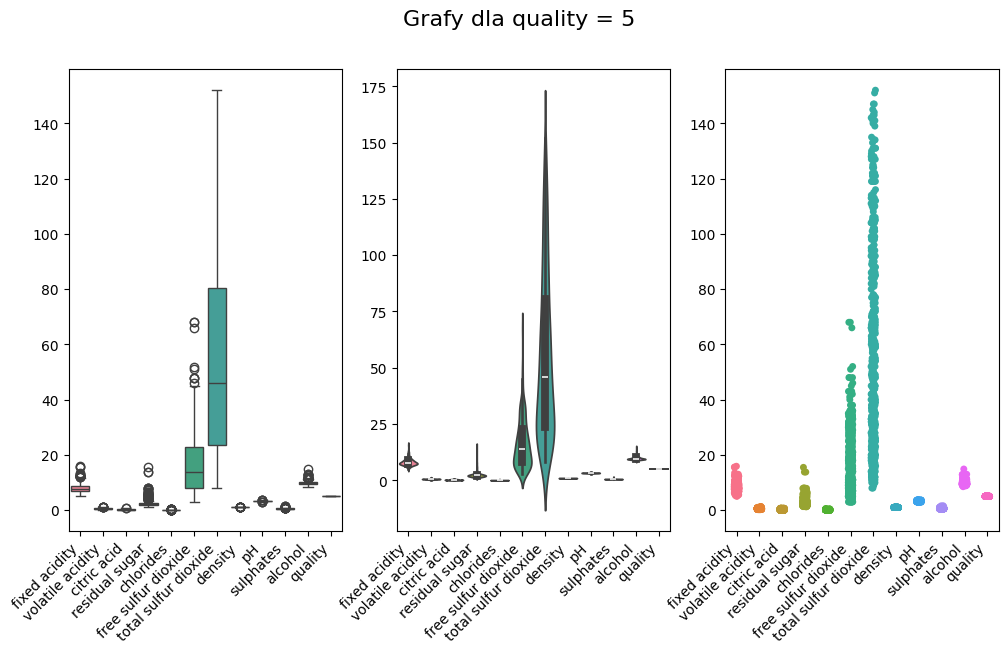

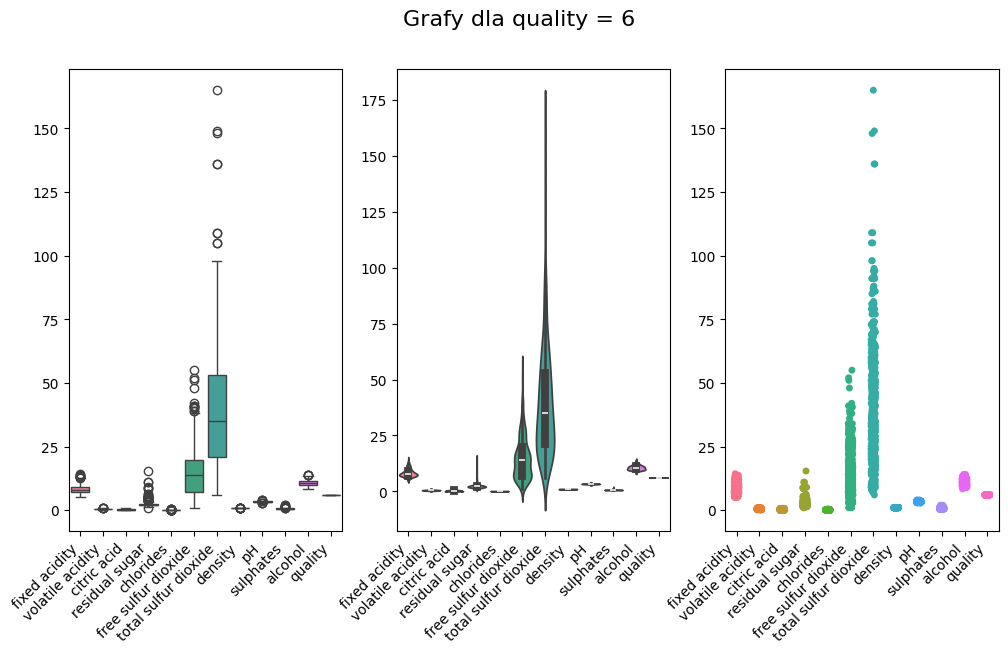

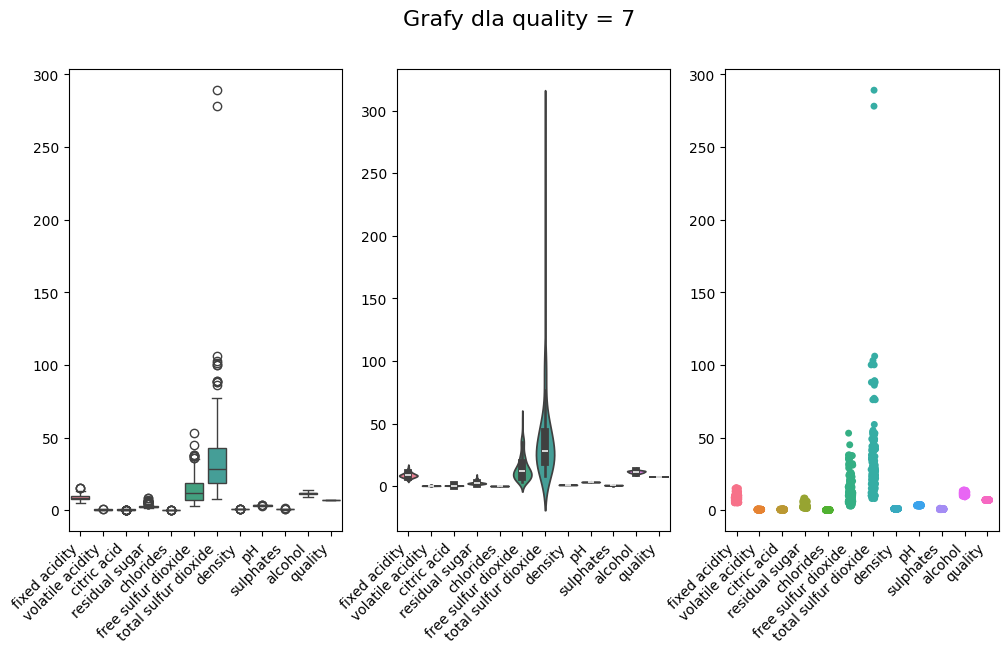

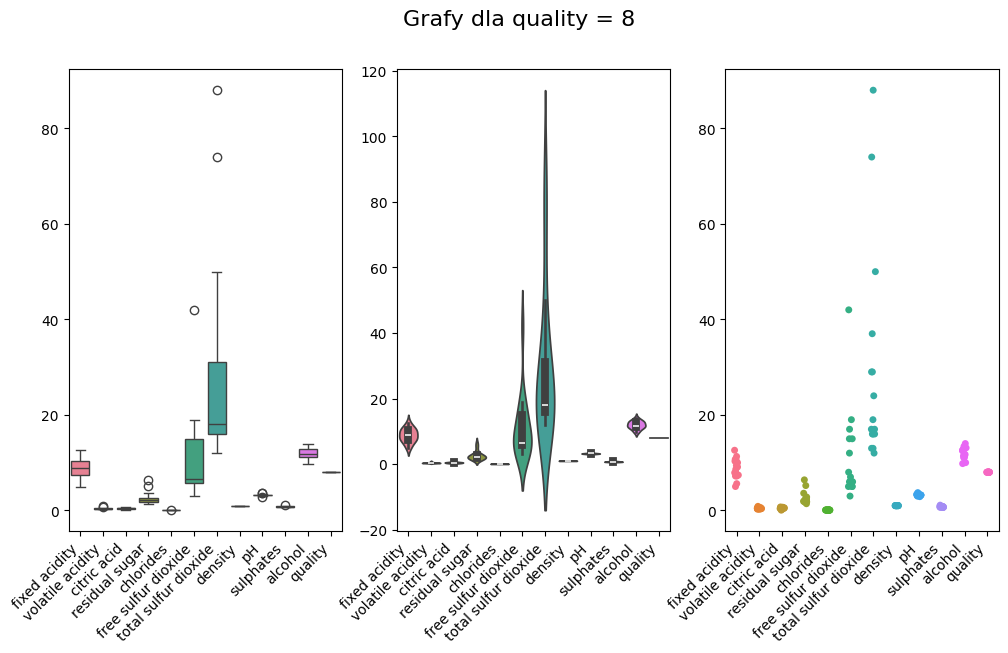

In [6]:
for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Po przeanalizowaniu wykresów atrybutów dla każdego quality osobno można wywnioskować, że wina jakości 3, 4, 6, 7, 8 posiadają obiekty o zbyt wysokiej wartości free sulfur dioxide i total sulffur dioxide. Te wyniki można uznać za błędne.

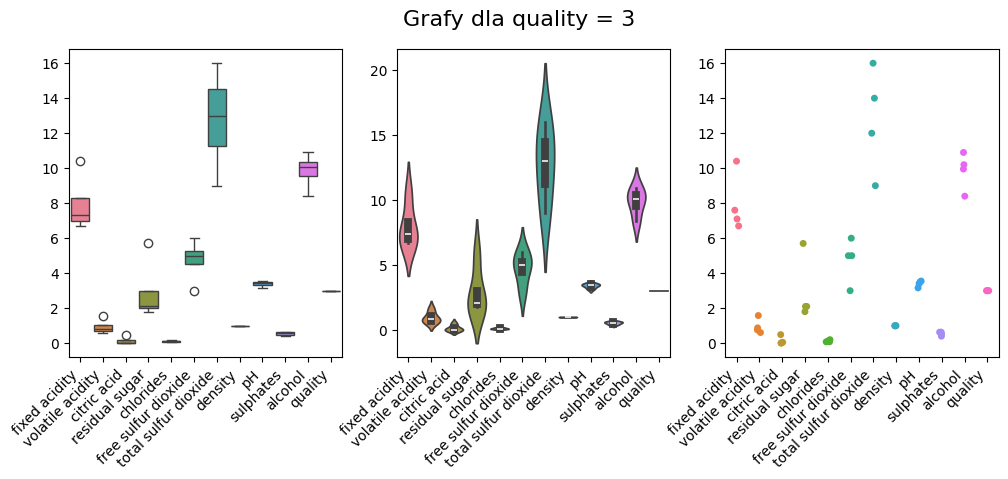

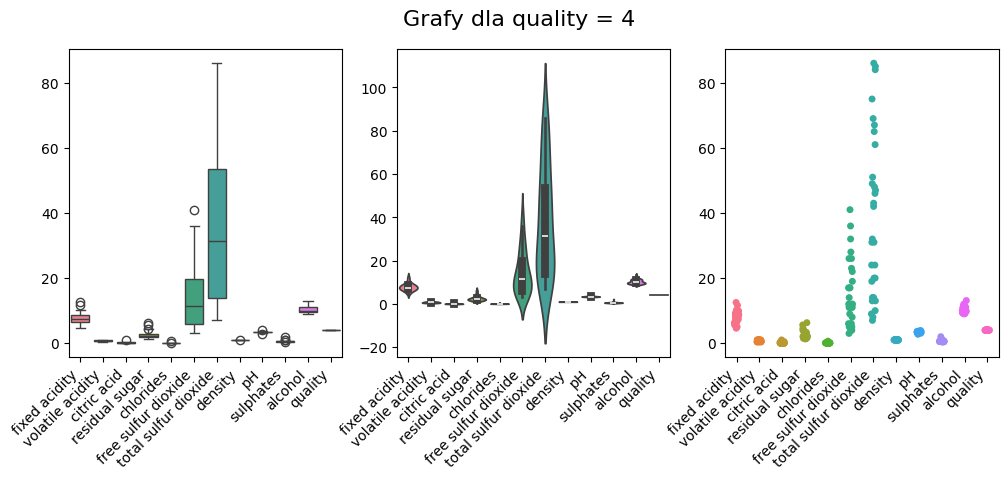

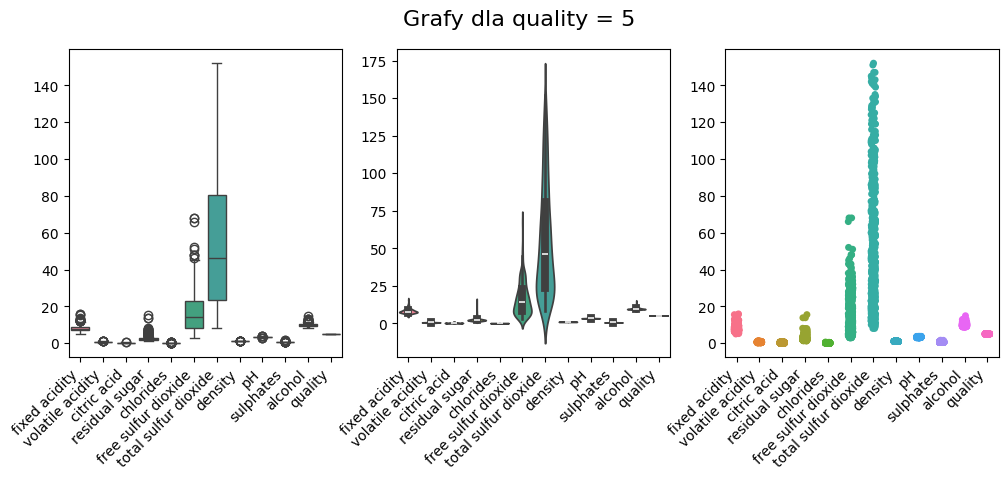

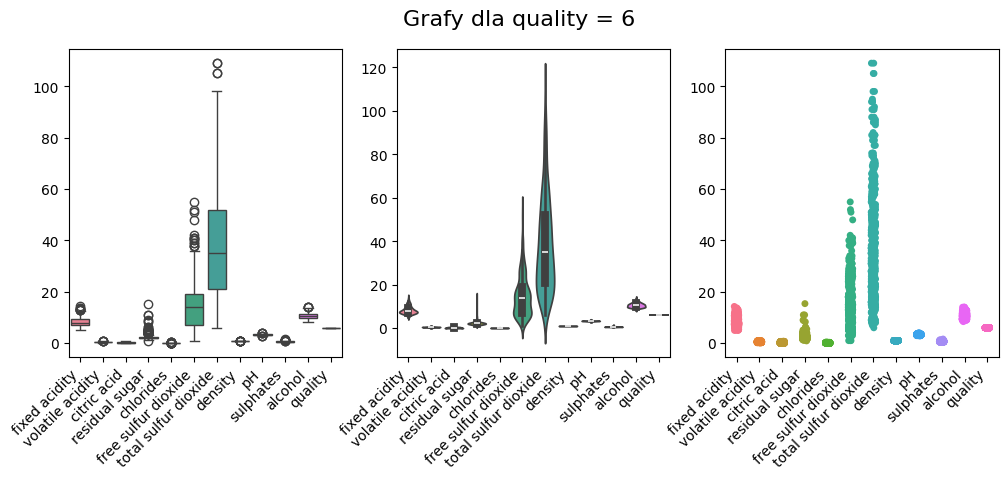

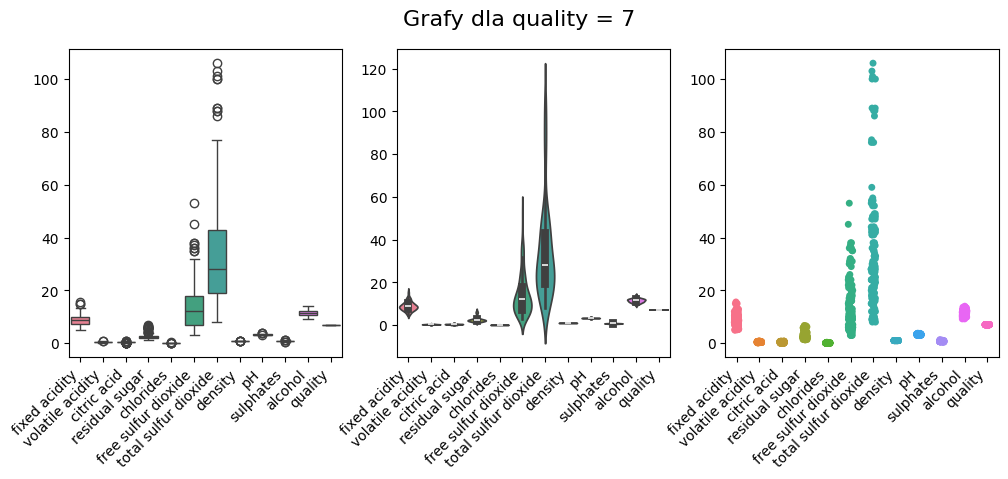

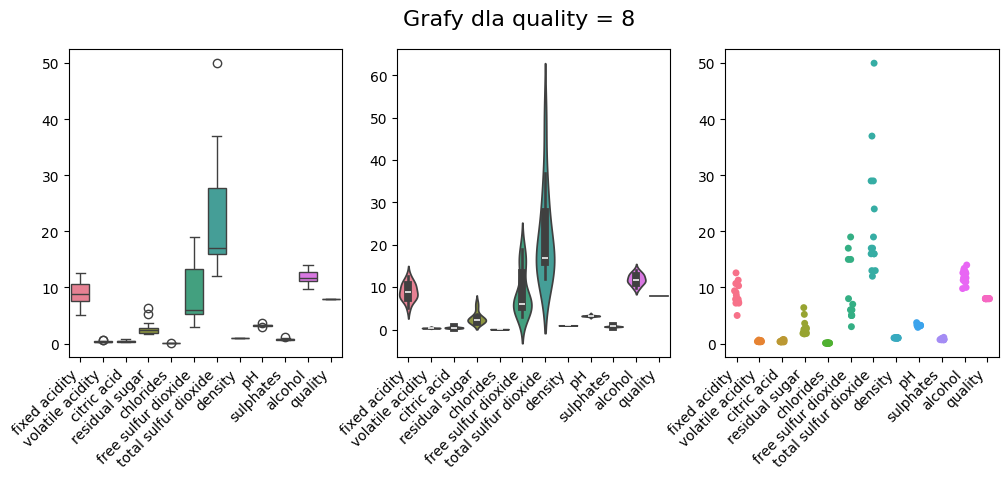

In [7]:
# usunięcie obiektów
df = df[(df['quality'] != 3) | (df['total sulfur dioxide'] <= 40)]
df = df[(df['quality'] != 3) | (df['free sulfur dioxide'] <= 15)]

df = df[(df['quality'] != 4) | (df['total sulfur dioxide'] <= 100)]

df = df[(df['quality'] != 6) | (df['total sulfur dioxide'] <= 125)]

df = df[(df['quality'] != 7) | (df['total sulfur dioxide'] <= 250)]

df = df[(df['quality'] != 8) | (df['total sulfur dioxide'] <= 60)]
df = df[(df['quality'] != 8) | (df['free sulfur dioxide'] <= 30)]

# ponowne wyświetlenie danych
for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Teraz wykresy prezentują się dokładniej

## Standardowe miary

In [8]:
opis = df.drop(columns = 'quality') # kolumna quality nie jest potrzebna przy obliczaniu miar
opis.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1131.000000       1131.000000  1131.000000     1131.000000   
mean        8.315119          0.531764     0.267162        2.522591   
std         1.748524          0.179025     0.196077        1.327152   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.400000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1131.000000          1131.000000           1131.000000  1131.000000   
mean      0.087088            15.503979             44.918214     0.996748   
std       0.047447            10.190605             30.538264     0.001907   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             37.000000     0.996700   
75%       0.090000            21.000000             60.000000     0.997860   
max       0.611000            68.000000            152.000000     1.003690   

                pH    sulphates      alcohol  
count  1131.000000  1131.000000  1131.000000  
mean      3.312838     0.655606    10.436546  
std       0.155411     0.161500     1.078194  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.725000    11.100000  
max       4.010000     2.000000    14.900000

Różnice pomiędzy wartością minimalną i maksymalną:
* fixed acidity = 7,6
* volatile acidity = 1,05
* citric acid = 0,73
* residual sugar = 15,27
* chlorides = 0,52
* free sulfur dioxide = 52,38
* total sulfur dioxide = 243,1
* density = 0,01
* pH = 0,7
* sulphates = 1,34
* alcohol = 4,5

Kolumny free sulfur dioxide i total sulfur dioxide rozróżniają się danymi większymi o rzędy wielkości w porównaniu do reszty atrybutów. Z drugiej strony, atrybuty o najmniejszych wartościach to citric acid i chlorides.

Znaczące odchylenie standardowe (powyżej 1) jest obecne dla atrybutów:
* fixed acidity
* residual sugar
* free sulfur dioxide (10,25)
* total sulfur dioxide (32,78)
* alcohol

Atrybuty chlorides i density mają znikome odchylenie standardowe, czyli wartości powinny tworzyć skupiska. 

## Korelacja

<Axes: >

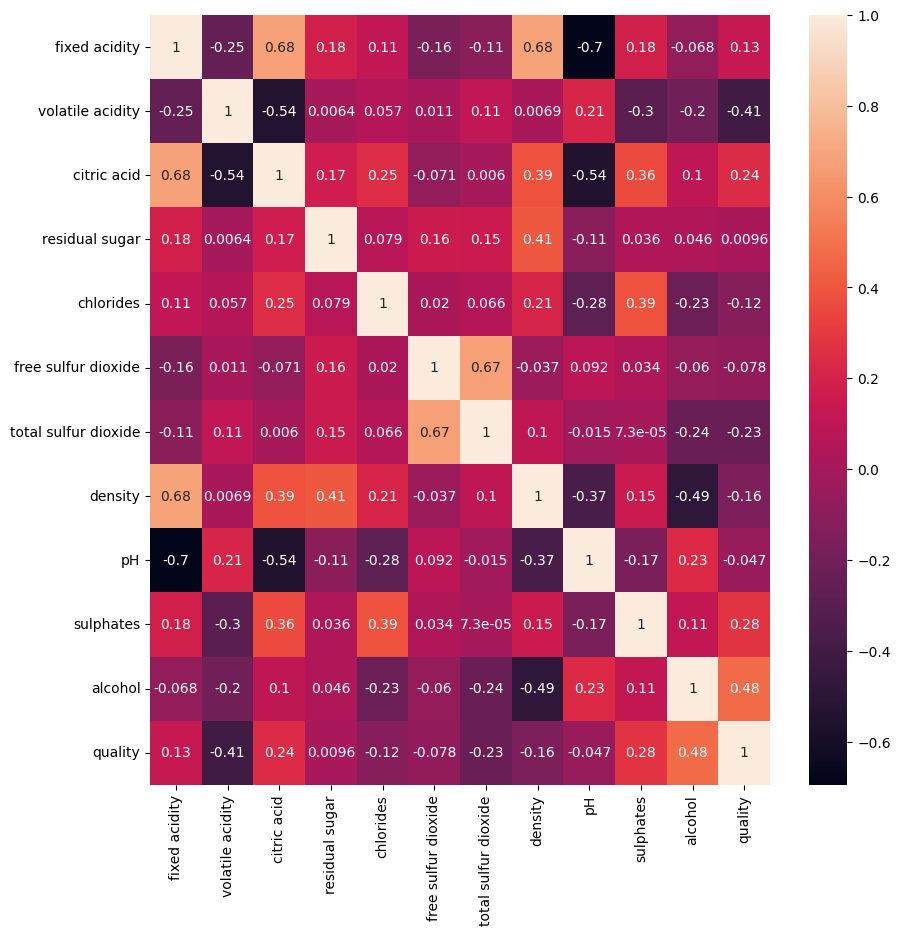

In [9]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.corr(),annot = df.corr())

Dane nie są ze sobą skorelowane. Korelacja mieści się w przedziale <-0,7; 0.68>


## Podział zbioru danych na zbiór uczący i testowy

In [8]:
# potrzebne importy i funkcje użyteczności
from sklearn.model_selection import train_test_split

def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja, random_state = 0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [10]:
dane = podziel(df, 0.3)

print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  800
Liczba obiektów zbioru testowego:  343


Dane zostały podzielone w relacji 70% - 30%

In [10]:
from sklearn.model_selection import train_test_split

# WYWOŁANIE:
# trin_test_split( macierz bez atr. decyzyjnego, macierz atrybutów decyzyjnych, prororcja, seed (do reprodukcji) )
opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.3, random_state=0)

# opis_ucz - macierz wartości atrybutów opisowych zbioru uczącego
# dec_ucz - macierz wartości (wektor) atrybutu decyzyjnego zbioru uczącego (quality)
# test_ucz - macierz wartości atrybutów opisowych zbioru testowego
# test_dec - macierz wartości (wektor) atrybutu decyzyjnego zbioru testowego (quality)
print('Liczba obiektów zbioru uczącego: ', len(opis_ucz))
print('Liczba obiektów zbioru testowego: ', len(opis_test))

Liczba obiektów zbioru uczącego:  791
Liczba obiektów zbioru testowego:  340


# Uczenie i testowanie zadanych klasyfikatorów

## Drzewo decyzyjne

In [14]:
#import itd, chwilowe, zeby nie psuc reszty
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix

df = pd.read_csv('WineQT.csv')
df = df.drop(columns = 'Id')

In [19]:
#funkcje pomocnicze

def verify(model, opis_ucz, opis_test, dec_ucz, dec_test):
    wynik_ucz = model.predict(opis_ucz)
    wynik_test = model.predict(opis_test)
    mp = confusion_matrix(dec_ucz, wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:", np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(opis_ucz, dec_ucz))
    print(mp)
    mp = confusion_matrix(dec_test, wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:", np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(opis_test, dec_test))
    print(mp)

In [20]:
opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.3, random_state=0)

for i, g in enumerate([4, 8, 12, 16, 24, 32]):
    # zapisać wyniki w słowniku (lub inaczej) i zrobić wizualizację, aby znależć najlepsze dopasowanie
    #wyniki = {4:}
    model = tree.DecisionTreeClassifier(max_depth = g)
    model.fit(opis_ucz, dec_ucz)
    verify(model, opis_ucz, opis_test, dec_ucz, dec_test)


macierz pomyłek - zbiór uczący, dokładność: 0.64
0.64
[[  0   0   4   0   0   0]
 [  0   0  18   6   0   0]
 [  0   0 273  48  11   0]
 [  0   0 115 184  26   0]
 [  0   0   6  41  55   0]
 [  0   0   0   4   9   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.6064139941690962
0.6064139941690962
[[  0   0   2   0   0   0]
 [  0   0   7   2   0   0]
 [  0   0 118  32   1   0]
 [  0   0  48  71  18   0]
 [  0   0   2  20  19   0]
 [  0   0   0   1   2   0]]
macierz pomyłek - zbiór uczący, dokładność: 0.8225
0.8225
[[  3   0   1   0   0   0]
 [  1  14   7   2   0   0]
 [  1   1 284  44   2   0]
 [  0   0  40 283   2   0]
 [  0   0   4  31  67   0]
 [  0   0   1   4   1   7]]
macierz pomyłek - zbiór testowy, dokładność: 0.6064139941690962
0.6064139941690962
[[  0   1   1   0   0   0]
 [  0   0   7   2   0   0]
 [  1   2 106  42   0   0]
 [  0   3  38  85  10   1]
 [  0   0   4  21  16   0]
 [  0   0   0   2   0   1]]
macierz pomyłek - zbiór uczący, dokładność: 0.97375
0.97375
[[  4   0 

## Ada Boost

# Opis wyników

In [11]:
def count_not_zero(list):
    '''
    function takes as parameter list and returns 
    number of elements with value higher than 0
    '''
    counter = 0
    for i in list:
        if i > 0:
            counter += 1
    return counter

def num_of_null(df):
    '''
    function takes as parameter DataFrame and returns two arrays:
    1 with the number of attributes missed in all objects
    2 with the number of attributes missed in every single object
    '''
    df = pd.isnull(df)
    missed_attr = [0] * len(df.count(0))
    missed_obj  = [0] * len(df.count(1))
    for i in range(len(df.count(0))):
        for j in range(len(df.count(1))):
            if df.iloc[j, i] == True:
                missed_attr[i] = missed_attr[i] + 1
                missed_obj[j] = missed_obj[j] + 1
    return missed_attr, missed_obj


missed_attr, missed_obj = num_of_null(df)

print(count_not_zero(missed_obj), "obiektów ma braki pośród danych")


0 obiektów ma braki pośród danych


In [ ]:
sns.pairplot(df.iloc[:, range(0, 12)], hue = 'quality')

tmp_df = df[(df.quality == 3) | (df.quality == 8)]

print(tmp_df)
sns.pairplot(tmp_df.iloc[:, range(0, 12)], hue = 'quality')

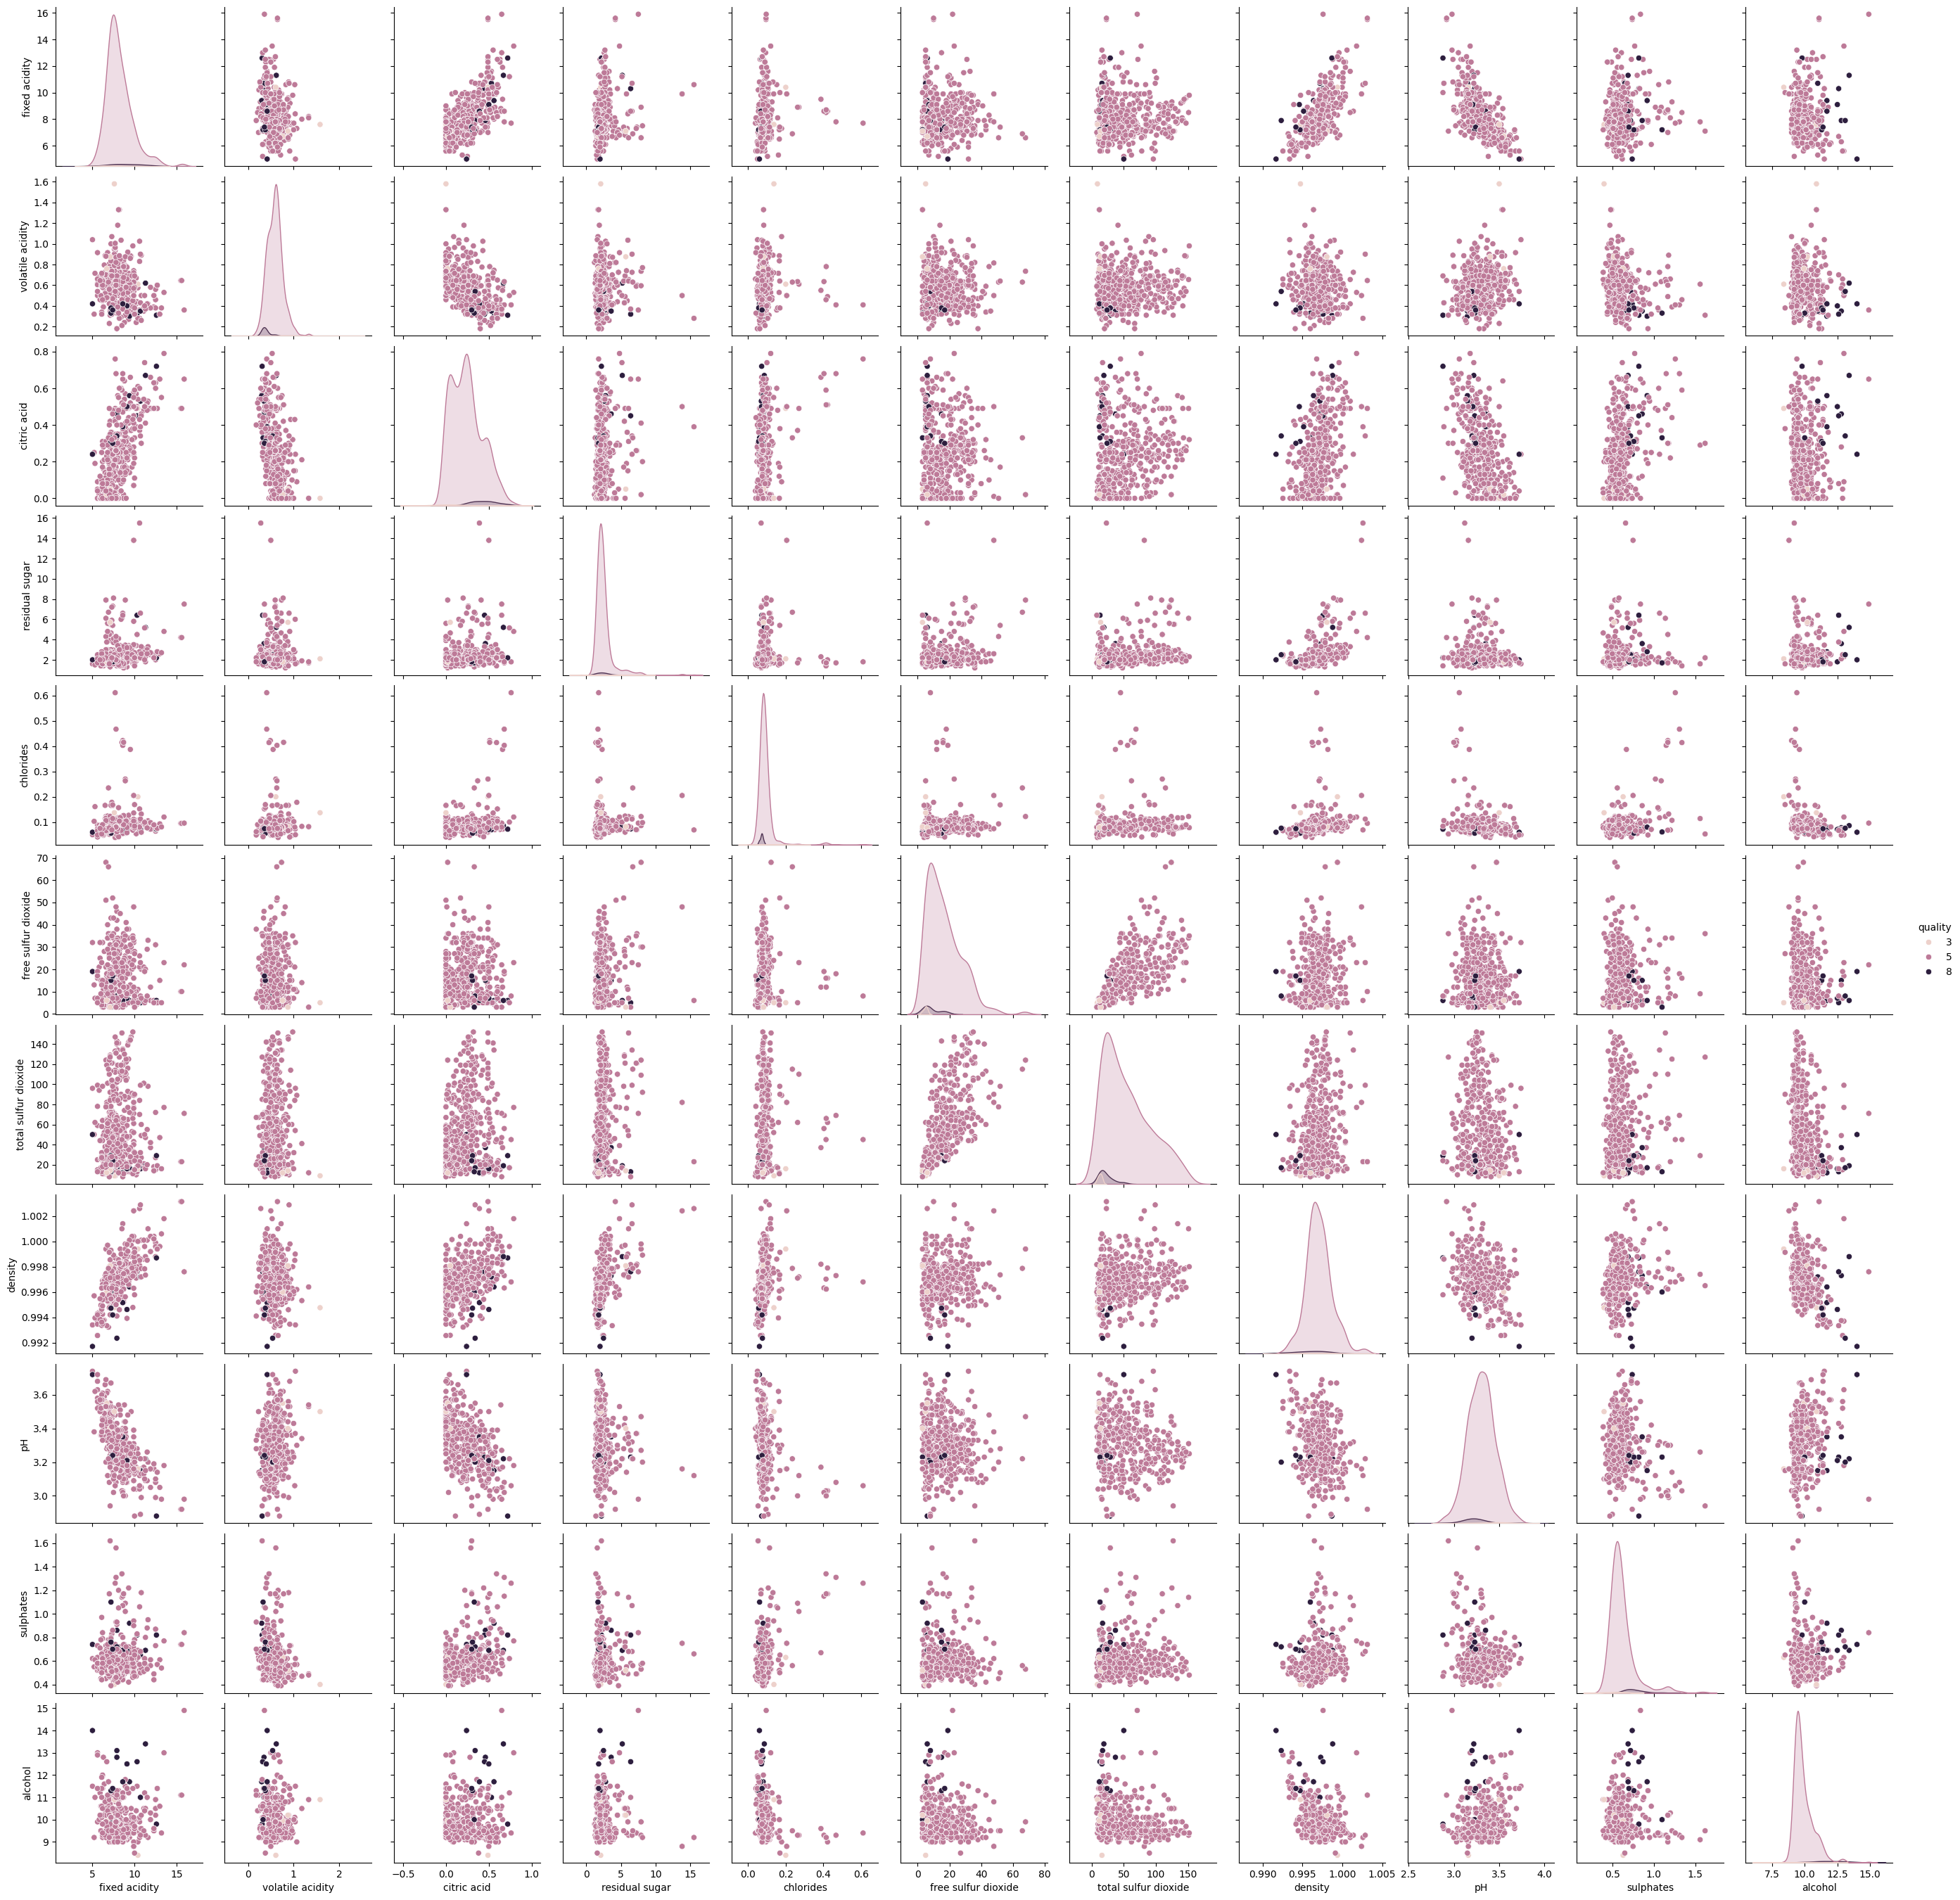

In [13]:
tmp_df = df[(df.quality == 3) | (df.quality == 5) | (df.quality == 8)]

sns.pairplot(tmp_df.iloc[:, range(0, 12)], hue = 'quality')

In [14]:
print(df[df['klasa'] == 0].describe())
print(df[df['klasa'] == 1].describe())
print(df[df['klasa'] == 2].describe())
print(df[df['klasa'] == 3].describe())

# zmienność poszczególnych atrybutów w całym zbiorze
plt.figure(figsize = (25,15))
plt.subplot(4,1,1)
sns.boxplot(data = df.iloc[:, 0:9])
plt.subplot(4,1,2)
sns.violinplot(data = df.iloc[:, 0:9])


# zmienność poszczególnych atrybutów w każdej klasie
plt.figure(figsize = (25, 15))

plt.subplot(4,2,1)
sns.boxplot(data = df[df['klasa'] == 0]).set_title("klasa 0")

plt.subplot(4,2,3)
sns.boxplot(data = df[df['klasa'] == 1]).set_title("klasa 1")

plt.subplot(4,2,5)
sns.boxplot(data = df[df['klasa'] == 2]).set_title("klasa 2")

plt.subplot(4,2,7)
sns.boxplot(data = df[df['klasa'] == 3]).set_title("klasa 3")

plt.subplot(4,2,2)
sns.violinplot(data = df[df['klasa'] == 0]).set_title("klasa 0")

plt.subplot(4,2,4)
sns.violinplot(data = df[df['klasa'] == 1]).set_title("klasa 1")

plt.subplot(4,2,6)
sns.violinplot(data = df[df['klasa'] == 2]).set_title("klasa 2")

plt.subplot(4,2,8)
sns.violinplot(data = df[df['klasa'] == 3]).set_title("3")

KeyError: 'klasa'